### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

First, let's inspect the data frame to see the column names and their types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

> **Step 2.1** There seems to be a lot of null values in `car` and some other fields. Let's count the missing values to prioritize where to start

In [5]:
print("----- Counting null values across columns -----")
null_counts = data.isnull().sum()
null_counts[null_counts > 0]

----- Counting null values across columns -----


car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64

There are many nulls in `car` (almost all the rows), and some in `Bar`, `CoffeeHouse`, `CarryAway`, `RestaurantLessThan20`, and `Restaurant20To50`. I will first check the `car` column

In [6]:
# Print a sample of rows including the car column
print('---- Sample of the df with the car column: -----')
print(data[['destination','time','coupon','gender','age','car']].sample(10)) # chose some other columns that made sense for me

# Get the value counts for car column
print('\n---- Value counts of the car column: -----')
print(data['car'].value_counts())

---- Sample of the df with the car column: -----
           destination  time                 coupon  gender      age  car
6114   No Urgent Place  10AM                    Bar    Male       26  NaN
378               Home   6PM                    Bar  Female       31  NaN
6658              Home   6PM           Coffee House    Male       26  NaN
4061              Work   7AM  Carry out & Take away  Female       21  NaN
5612   No Urgent Place   6PM        Restaurant(<20)    Male       26  NaN
1220   No Urgent Place   2PM           Coffee House    Male  below21  NaN
1999              Home   6PM      Restaurant(20-50)    Male       21  NaN
1747   No Urgent Place   2PM           Coffee House  Female       26  NaN
6878              Home  10PM  Carry out & Take away  Female   50plus  NaN
10345  No Urgent Place  10AM           Coffee House    Male       21  NaN

---- Value counts of the car column: -----
car
Scooter and motorcycle                      22
Mazda5                                    

From the above observations about the car column, `NaN` values are *NOT* problematic (they just seem to imply 'any' car). For the non-NaN values (i.e. Mazda5), I conclude that most of them are *NOT* problematic with the exception of `do not drive`. Note that even though is it presumed that the user is in a car, those that are marked with `Scooter and motorcycle` may still work in terms of proving the effectiveness of the coupons.

> **Conclusion:** I will only remove entries with the car == `do not drive` mark.

> **Step 2.2** For the other columns that contain NaN values, I will analyze them as a single unit for conciseness. For this, my strategy is to `count the number of NaNs per row` across the columns that are known to contain NaNs, then decide how to tackle each group.

In [7]:
# Count NaNs in these columns for each row and save in new column
data['NaN_count'] = data[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']].isnull().sum(axis=1)

# Groupby the NaN_count
nan_counts_summary = data.groupby('NaN_count').size().reset_index(name='Number of Rows')
nan_counts_summary['% NaN'] = nan_counts_summary['Number of Rows'] / 12684

# Print results
nan_counts_summary['% NaN'] = nan_counts_summary['% NaN'].apply(lambda x: f"{x:.2%}") # this is just to print prettier percentages
print("Summary of NaN counts:")
print(nan_counts_summary)

Summary of NaN counts:
   NaN_count  Number of Rows   % NaN
0          0           12079  95.23%
1          1             542   4.27%
2          2              21   0.17%
3          5              42   0.33%


From the above table one can see that most rows don't contain NaN values (95%). I conclude the following:
1. I would be generally `ok loosing rows with NaN values` since they represent less than 5% of the population. 
2. Regardless, I will try to at least `inspect those with only 1 NaN`
3. I will proceed to `remove those with 2 or 5 NaNs` across their columns.

In [8]:
# Inspecting rows with only 1 NaN
sample_1_NaN = data[data['NaN_count'] == 1].sample(5)
sample_1_NaN[['destination', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'education', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']]

,destination,time,coupon,expiration,gender,age,maritalStatus,education,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
4875,No Urgent Place,10AM,Coffee House,2h,Male,31,Married partner,Bachelors degree,never,never,never,less1,NaN
9139,No Urgent Place,2PM,Restaurant(20-50),1d,Male,below21,Single,Some college - no degree,never,never,less1,never,NaN
923,Work,7AM,Coffee House,2h,Female,31,Unmarried partner,Associates degree,never,never,4~8,NaN,never
496,No Urgent Place,10AM,Coffee House,2h,Male,26,Unmarried partner,Bachelors degree,never,NaN,less1,less1,less1
11845,No Urgent Place,6PM,Restaurant(<20),2h,Male,26,Unmarried partner,Graduate degree (Masters or Doctorate),less1,NaN,1~3,never,never


In [9]:
# Printing value counts for all other vars:
print('---- Value counts of the CoffeeHouse column: -----')
print(data['CoffeeHouse'].value_counts())

print('\n---- Value counts of the CarryAway column: -----')
print(data['CarryAway'].value_counts())

print('\n---- Value counts of the RestaurantLessThan20 column: -----')
print(data['RestaurantLessThan20'].value_counts())

print('\n---- Value counts of the Restaurant20To50 column: -----')
print(data['Restaurant20To50'].value_counts())

---- Value counts of the CoffeeHouse column: -----
CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

---- Value counts of the CarryAway column: -----
CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64

---- Value counts of the RestaurantLessThan20 column: -----
RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

---- Value counts of the Restaurant20To50 column: -----
Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64


I can't see any clear patterns for these entries that contain exactly 1 NaN. Also, the only other alternative would be to assume that NaN = 'never', but my intuition tells me that this may not be true and instead is just a 'missing information'. Therefore, I think the best course of action is to remove the rows that contain 1 NaN.

> **Conclusion**: Rows with any number of `NaN` values in columns `Bar`, `CoffeeHouse`, `CarryAway`, `RestaurantLessThan20`, `Restaurant20To50` will be removed from the analysis.

Now, lets check some of the other columns in the dataset. I will try to check for the following cases:
1. Are there redundant columns?
2. Are there columns that do not provide any information or have no value variation (i.e. are constant)?

In [10]:
# For conciseness purposes, I'm only showing the columns where I found those cases
# Checking column toCoupon_GEQ5min value counts
print("------- Column 'toCoupon_GEQ5min' value counts -------")
print(data['toCoupon_GEQ5min'].value_counts())

# Checking if direction_same is just the inverse of direction_opp
print("\n------- Checking if 'direction_same' and 'direction_same' are just the inverse of the other -------")
rows_diff = data[data['direction_same'] == data['direction_opp']] # this will return rows where the 2 columns are equal. Note that there's only 0s and 1s
print("Number of rows where direction_same = direction_opp = " + str(len(rows_diff)))

------- Column 'toCoupon_GEQ5min' value counts -------
toCoupon_GEQ5min
1    12684
Name: count, dtype: int64

------- Checking if 'direction_same' and 'direction_same' are just the inverse of the other -------
Number of rows where direction_same = direction_opp = 0


> **Conclusions**: Column `toCoupon_GEQ5min` doesn't provide any value since it is all 1s. Also, column `direction_opp` is just the inverse of `direction_same`, so I'll just keep 1 of the columns.

3. Decide what to do about your missing data -- drop, replace, other...

In [11]:
# Cleaning data based on all previous conclusions
cleaned_data = data[data['car'] != 'do not drive'] # remove car = do not drive
cleaned_data = cleaned_data[cleaned_data['NaN_count'] == 0] # remove rows with any # of NaN values
cleaned_data = cleaned_data.drop("toCoupon_GEQ5min", axis=1) # remove column 'toCoupon_GEQ5min'
cleaned_data = cleaned_data.drop("direction_opp", axis=1) # remove column 'direction_opp'

print("------ Sample of cleaned dataframe: -------")
print(cleaned_data.sample(5))
print("\n------ Cleaned data stats: -------")
print("Rows remaining in cleaned dataframe = " + str(len(cleaned_data)))
print("# of rows dropped = " + str(len(data) - len(cleaned_data)))

------ Sample of cleaned dataframe: -------
          destination  passanger weather  temperature  time  \
9355             Work      Alone   Sunny           80   7AM   
5108  No Urgent Place  Friend(s)   Sunny           80   6PM   
6847  No Urgent Place  Friend(s)   Sunny           80   6PM   
5470             Home      Alone   Sunny           80  10PM   
894              Home      Alone   Sunny           55   6PM   

                     coupon expiration  gender     age    maritalStatus  ...  \
9355        Restaurant(<20)         1d  Female  50plus           Single  ...   
5108        Restaurant(<20)         1d  Female      21           Single  ...   
6847      Restaurant(20-50)         2h  Female      46  Married partner  ...   
5470  Carry out & Take away         1d    Male      26           Single  ...   
894       Restaurant(20-50)         1d  Female      21           Single  ...   

        Bar CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
9355  never       nev

4. What proportion of the total observations chose to accept the coupon?



In [12]:
# Note that from here onwards I will be using the cleaned_data df since that's my quality checked data
# I will get the rows where Y = 1 (accepted) and count the number of rows. Then divide by the total size of the dataframe
drivers_accepted_coupon = cleaned_data[cleaned_data['Y'] == 1]
pc_accepted = len(drivers_accepted_coupon) / len(cleaned_data)
print(f"{pc_accepted:.2%}")

56.95%


5. Use a bar plot to visualize the `coupon` column.

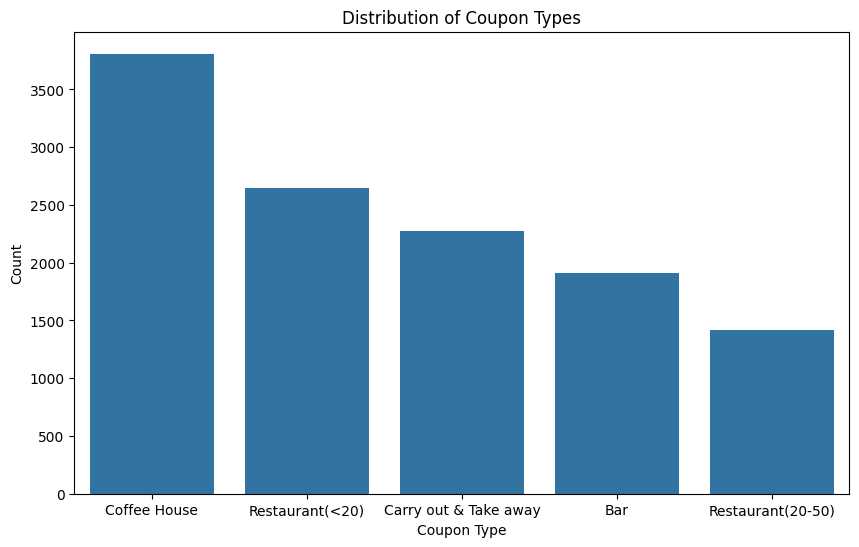

In [13]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the plot. Note that I used countplot instead of barplot for conciseness (otherwise cleaned_data['coupon'].value_counts() would have been required)
sns.countplot(data=cleaned_data, x='coupon', order=cleaned_data['coupon'].value_counts().index) # Order bars by frequency

# Add titles and labels
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')

plt.show()

6. Use a histogram to visualize the temperature column.

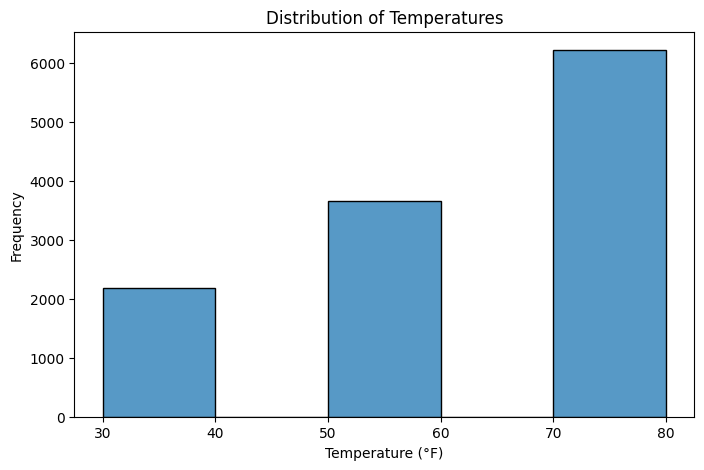

In [14]:
# Set the figure size
plt.figure(figsize=(8, 5))

# Create the histogram. Chose a # of bins that makes the chart look pretier
sns.histplot(data=cleaned_data, x='temperature', bins=5)

# Add titles and labels
plt.title('Distribution of Temperatures')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')

plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [15]:
# Filtering out using coupon columns = Bar
bar_coupons = cleaned_data[cleaned_data['coupon'] == 'Bar'].copy()
bar_coupons.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y,NaN_count
11188,Work,Alone,Snowy,30,7AM,Bar,1d,Female,below21,Unmarried partner,...,never,gt8,gt8,gt8,less1,1,1,0,1,0
5733,Home,Alone,Sunny,80,10PM,Bar,1d,Male,21,Single,...,less1,1~3,1~3,1~3,less1,1,0,1,0,0
6147,No Urgent Place,Partner,Sunny,80,6PM,Bar,2h,Male,46,Married partner,...,never,never,less1,4~8,1~3,1,0,0,1,0
11821,Work,Alone,Snowy,30,7AM,Bar,1d,Male,36,Married partner,...,never,less1,4~8,1~3,less1,1,1,0,0,0
11125,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,50plus,Single,...,1~3,4~8,4~8,1~3,less1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [16]:
# Filter out accepted bar coupons using Y column
accepted_bar_coupons = bar_coupons[bar_coupons['Y'] == 1]
pc_bar_accepted = len(accepted_bar_coupons) / len(bar_coupons)
print(f"{pc_bar_accepted:.2%}")

41.13%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [17]:
# running bar_coupons['Bar'].value_counts() tells us that there's 5 categories: 'never', 'less1', '1~3', '4~8', 'gt8'
# I will first create new column that tells if went to bar 3 or fewer times, or more

# Categories for '3 or fewer'
three_or_fewer_cats = ['never', 'less1', '1~3']

# Create the 'Bar2' column
bar_coupons['Bar2'] = bar_coupons['Bar'].apply(
    lambda freq: '<=3' if freq in three_or_fewer_cats else '>3'
)

print(bar_coupons['Bar2'].value_counts())

Bar2
<=3    1720
>3      191
Name: count, dtype: int64


In [18]:
# Now I will calculate the % accepted for both groups. I will print .value_counts just as a way to double check my answer

# Separating groups
lte3_group = bar_coupons[bar_coupons['Bar2'] == '<=3']
gt3_group = bar_coupons[bar_coupons['Bar2'] == '>3']

# Print value counts
print("----- Value counts for <= 3 group: -----")
print(lte3_group['Y'].value_counts())
print("\n----- Values counts for > 3 group: -----")
print(gt3_group['Y'].value_counts())

# Calculating acceptance rates per group (<=3 vs >3)
lte3_group_accepted = lte3_group[lte3_group['Y'] == 1]
pc_accepted_bar_lte3 = len(lte3_group_accepted) / len(lte3_group)

gt3_group_accepted = gt3_group[gt3_group['Y'] == 1]
pc_accepted_bar_gt3 = len(gt3_group_accepted) / len(gt3_group)

# Print final result
print(f"\n% Accepted <=3: {pc_accepted_bar_lte3:.2%}")
print(f"% Accepted >3:  {pc_accepted_bar_gt3:.2%}")


----- Value counts for <= 3 group: -----
Y
0    1079
1     641
Name: count, dtype: int64

----- Values counts for > 3 group: -----
Y
1    145
0     46
Name: count, dtype: int64

% Accepted <=3: 37.27%
% Accepted >3:  75.92%


> **Result**: Drivers that go to the bar more than 3 times are 2x more likely to accept a coupon (`75%` vs. `37%`)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [19]:
# I will create a helper column 'age2' that says <=25 or >25 based on the original 'age' column
# Running bar_coupons['age'].value_counts() shows that the age groups are: below21 and 21 for the first group, then all the others

# Categories for '25 or less'
lte25_cats = ['below21', '21']

# Create the 'age2' column
bar_coupons['age2'] = bar_coupons['age'].apply(
    lambda age: '<=25' if age in lte25_cats else '>25'
)

print(bar_coupons['age2'].value_counts())

age2
>25     1433
<=25     478
Name: count, dtype: int64


Regarding the group that go to a bar more than once a month, here's 2 assumptions:
1. In problem description at the top of the notebook it was never specified that the frequency of the data was monthly. I will assume that 'Bar' column values (`never`, `less1`, `1~3`, `4~8`, `gt8`) mean 'per-month'
2. Given the granularity of the data provided, the best choice to segment drivers that go to the bar more than one a month is to use the `1~3`, `4~8`, `gt8` groups (note that 1 is within `1~3`, so part of this group doesn't comply with this condition). Regardless, I expect the 1~3 group to contain more drivers that do meet the >1 month condition than those who don't 

In [20]:
# I will create a helper column 'bar3' that says <=1 or >1 based on the original 'age' column

# Categories for '1 or less'
lte1_cats = ['never', 'less1', '1~3']

# Create the 'bar3' column
bar_coupons['Bar3'] = bar_coupons['Bar'].apply(
    lambda freq: '<=1_per_month' if freq in lte1_cats else '>1_per_month'
)

print(bar_coupons['Bar3'].value_counts())

Bar3
<=1_per_month    1720
>1_per_month      191
Name: count, dtype: int64


In [21]:
# Separating groups. Desired test group is: Bar3 = '>1_per_month' and age2 = '>25'
drinkers_older_25 = bar_coupons[(bar_coupons['age2'] == '>25') & (bar_coupons['Bar3'] == '>1_per_month')]
all_others = bar_coupons.drop(drinkers_older_25.index)

# Print value counts
print("----- Value counts for test group (>1_per_month and >25): -----")
print(drinkers_older_25['Y'].value_counts())
print("\n----- Values counts for all others group: -----")
print(all_others['Y'].value_counts())

# Calculating acceptance rates per group (<=3 vs >3)
drinkers_older_25_accepted = drinkers_older_25[drinkers_older_25['Y'] == 1]
pc_drinkers_older_25_accepted = len(drinkers_older_25_accepted) / len(drinkers_older_25)

all_others_accepted = all_others[all_others['Y'] == 1]
pc_all_others_accepted = len(all_others_accepted) / len(all_others)

# Print final result
print(f"\n% Accepted Test Group (>1_per_month and >25): {pc_drinkers_older_25_accepted:.2%}")
print(f"% Accepted All Others:                        {pc_all_others_accepted:.2%}")

----- Value counts for test group (>1_per_month and >25): -----
Y
1    100
0     31
Name: count, dtype: int64

----- Values counts for all others group: -----
Y
0    1094
1     686
Name: count, dtype: int64

% Accepted Test Group (>1_per_month and >25): 76.34%
% Accepted All Others:                        38.54%


> **Conclusion**: Drivers that go to the bar >1 per month and are >25 years old are 2x more likely to accept a coupon than the rest (`76%` vs `38%` respectively)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In this case I will use more concise approach by creating 3 boolean series that represent the conditions stated, to help filter out the groups:
1. passengers_not_kids -> boolean series that is True when `Alone`, `Friend(s)` or `Partner`
2. farming_fishing_forestry_ocupations -> boolean series that is True when occupation is `Farming Fishing & Forestry`. I will negate this series
3. frequent_drinkers -> boolean series that is True when drivers go to the bar >1 per month (`1~3`, `4~8`,`gt8`)

In [22]:
# Creating the boolean series to filter out each condition
passengers_not_kids = bar_coupons['passanger'].isin({'Alone','Friend(s)','Partner'})
farming_fishing_forestry_ocupations = bar_coupons['occupation'] == 'Farming Fishing & Forestry'
frequent_drinkers = bar_coupons['Bar'].isin({'1~3','4~8','gt8'})

# Filtering out using all the conditions
q5_group = bar_coupons[passengers_not_kids & ~farming_fishing_forestry_ocupations & frequent_drinkers]
q5_not_group = bar_coupons.drop(q5_group.index)

# Printing the value counts for Y
print("----- Value counts for group: (passenger_not_kids and not farming_fishing_forestry_occupation and frequent_drinkers): -----")
print(q5_group['Y'].value_counts())

print("\n----- Value counts for Others group: -----")
print(q5_not_group['Y'].value_counts())

# Calculating acceptance rates per group
q5_group_accepted = q5_group[q5_group['Y'] == 1]
pc_q5_group_accepted = len(q5_group_accepted) / len(q5_group)

q5_not_group_accepted = q5_not_group[q5_not_group['Y'] == 1]
pc_q5_not_group_accepted = len(q5_not_group_accepted) / len(q5_not_group)

# Print final result
print(f"\n% Accepted Test Group: {pc_q5_group_accepted:.2%}")
print(f"% Accepted All Others: {pc_q5_not_group_accepted:.2%}")

# q5_group[['passanger','occupation','age','coupon']].sample(15)

----- Value counts for group: (passenger_not_kids and not farming_fishing_forestry_occupation and frequent_drinkers): -----
Y
1    374
0    154
Name: count, dtype: int64

----- Value counts for Others group: -----
Y
0    971
1    412
Name: count, dtype: int64

% Accepted Test Group: 70.83%
% Accepted All Others: 29.79%


> **Conclusion**: Drivers `without kid passengers` that go to bars more than `once per month` and don't have the `Farming Fishing & Forestry` occupation are `2.3x` more likely to accept the coupons than the rest of the population (~71% vs. ~30%)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



*Note*: doing my best to solve this ambiguous question. 

I will assume that you want me to compare a single group consisting of drivers that meet the OR conditions above, vs. the rest of the population. Hopefully this is what you guys meant. Maybe you could have stated more clearly what to compare against because that "OR" really throws me off: I'm not sure if you want me to apply an OR operation across all the bullet conditions above, or, compare each bullet against each other. 

Below you find `solution to intepretation #1 of question 6`: you wanted me to compute a single group that meets the OR conditions above, and compare against the remainder of the population

In [23]:
# Creating the boolean series to filter out each condition
# Creating bullet 1
frequent_drinkers = bar_coupons['Bar'].isin({'1~3','4~8','gt8'}) # go to bars >1 per month
passengers_not_kids = bar_coupons['passanger'].isin({'Alone','Friend(s)','Partner'}) # no kids
not_widowed = bar_coupons['maritalStatus'] != 'Widowed'
bullet_1_group_conditions = frequent_drinkers & passengers_not_kids & not_widowed

# Creating bullet 2
# will resuse frequent_drinkers variable from above
age_lt30 = bar_coupons['age'].isin({'below21','21','26'})
bullet_2_group_conditions = frequent_drinkers & age_lt30

# Creating bullet 3
cheap_rests_gt4_per_week = bar_coupons['RestaurantLessThan20'].isin({'4~8', 'gt8'})
income_lt_50k = bar_coupons['income'].isin({'Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999'})
bullet_3_group_conditions = cheap_rests_gt4_per_week & income_lt_50k

# Consolidating all conditions with OR
q6_group = bar_coupons[bullet_1_group_conditions | bullet_2_group_conditions | bullet_3_group_conditions]
q6_not_group = bar_coupons.drop(q6_group.index)

# Printing value counts
print("----- Bullet 1 OR Bullet 2 OR Bullet 3 value counts: -----")
print(q6_group['Y'].value_counts())
print("\n----- Others group value counts: -----")
print(q6_not_group['Y'].value_counts())

# Print final result
print(f"\n% Accepted Test Group (Bullet 1 OR Bullet 2 OR Bullet 3): {436/(436+308):.2%}")
print(f"% Accepted All Others: {350/(350+817):.2%}")

----- Bullet 1 OR Bullet 2 OR Bullet 3 value counts: -----
Y
1    436
0    308
Name: count, dtype: int64

----- Others group value counts: -----
Y
0    817
1    350
Name: count, dtype: int64

% Accepted Test Group (Bullet 1 OR Bullet 2 OR Bullet 3): 58.60%
% Accepted All Others: 29.99%


> **Conclusion**: drivers that meet any of the 3 group conditions mentioned above are more likely to accept a coupon than the rest of the population. In particular, it's interesting to see that drivers NOT in any of the 3 buckets described in the bullets above have low acceptance rates (30%)

Below you find `solution to intepretation #2 of question 6`: you wanted me to calculate acceptance rates for each bullet, then compare against each other

In [24]:
print("----- Bullet 1 group value counts: -----")
print(bar_coupons[bullet_1_group_conditions]['Y'].value_counts())
print(f"% Bullet 1 Accepted: {374/(374+154):.2%}")

print("\n----- Bullet 2 group value counts: -----")
print(bar_coupons[bullet_2_group_conditions]['Y'].value_counts())
print(f"% Bullet 2 Accepted: {234/(234+92):.2%}")

print("\n----- Bullet 3 group value counts: -----")
print(bar_coupons[bullet_3_group_conditions]['Y'].value_counts())
print(f"% Bullet 3 Accepted: {152/(152+181):.2%}")

----- Bullet 1 group value counts: -----
Y
1    374
0    154
Name: count, dtype: int64
% Bullet 1 Accepted: 70.83%

----- Bullet 2 group value counts: -----
Y
1    234
0     92
Name: count, dtype: int64
% Bullet 2 Accepted: 71.78%

----- Bullet 3 group value counts: -----
Y
0    181
1    152
Name: count, dtype: int64
% Bullet 3 Accepted: 45.65%


> **Conclusion**: Groups for Bullet 1 (go to bars >1 per month, had passengers that were not a kid, and were not widowed) and Bullet 2 (go to bars >1 per month and are under the age of 30) have high acceptance rates (+70%). Instead, Group 3 (go to cheap restaurants more than 4 times a month and income is less than 50K) underperformed with only ~46% acceptance rate

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

First let me consolidate some data points we've gathered from the previous questions.

| # | Segment of the Population                                                                              | Acceptance Rate |
|---|--------------------------------------------------------------------------------------------------------|-----------------|
| 1 | All Population *(baseline)*                                                                            | 56.95%          |
| 2 | Bar only *(q2)*                                                                                        | 41.13%          |
| 3 | >3 bar visits/month *(q3)*                                                                             | 75.92%          |
| 4 | >1 bar visit/month & age > 25y *(q4)*                                                                  | 76.34%          |
| 5 | >1 bar visit/month & age < 30y *(q6 bullet 2)*                                                         | 71.78%          |
| 6 | >1 bar visit/month & passenger != kids & not in farming/fishing/forestry jobs *(q5)*                   | 70.83%          |
| 7 | >1 bar visit/month & passenger != kids & not widowed *(q6 bullet 1)*                                   | 70.83%          |

From this table one can conclude the following:
1. Bar coupons `underperform` in relation to the other coupons in the dataset (by `~15%`)
2. `Bar visits` is a strong signal to bar coupon acceptance. The difference in effectiveness between a >3 visits/month vs. a >1 visits/month is small. Therefore I recommend using `>1 visits/month` as filtering criteria. Using this criteria creates an uplift of `~30%` *(calulation: #4 - #2 = 71%-41%)*
3. `Age` seems to have limited effectiveness, as seen when comparing #4 and #5 (which only differ by the age criteria). The difference between `>25y and <30y is only ~5%`. The remaining criteria to decide what a good threshold would be is to consider the % of the population that fits the criteria. Since >25y will cover a bigger age range, I'd recommend using that as threshold instead of <30y. Therefore, use `Age > 25y`
4. Regarding the type of `passenger` (kids vs. not kids), it seems the variable unexpectedly has little impact on the decision to accept a coupon (I did check the # of drivers presented with bar coupons that had kids as passengers, at it was tiny: just 42 drivers). I do not recommend using passenger filters in this case
5. Regarding the `occupation` and whether the driver is `widowed` or not, those seem to have neglible effects (compare #6 and #7, which only differ in these aspects). I do not recommend using these criteria as targetting strategies either. 

> **CONCLUSION**: To best target drivers that would accept coupons, I'd use the following criteria: `Bar visits > 1/month` & `Age > 25y`

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  